# Linear Regression 실습 
   * 아버지의 키와 아들의 키에 대한 회귀모형 
   * X 변수가 하나인 Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [4]:
# CSV파일 불러오기
data = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/heights.csv')

In [6]:
data.shape

(1078, 2)

In [7]:
# 결측치 확인 
data.isnull().sum()

father    0
son       0
dtype: int64

# 산점도로 전체 데이터 분포 파악하기

Text(0, 0.5, 'son')

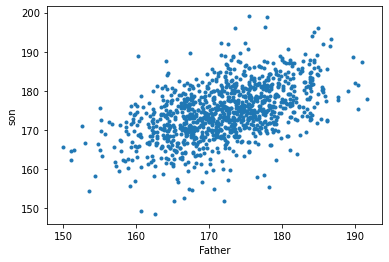

In [9]:
import matplotlib.pyplot as plt

X = data['father']
y = data['son']

plt.plot(X, y, '.')
plt.xlabel('Father')
plt.ylabel('son')

# 훈련데이터와 테스트데이터 분리하기 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.values

array([179.7426428, 183.7417966, 178.0826004, 182.3291756, 174.3446094,
       173.4406488, 166.3236704, 164.62629  , 169.9563022, 178.418109 ,
       167.2014182, 157.8077108, 178.9448288, 174.9714814, 164.0612924,
       165.940359 , 178.3983986, 175.378364 , 178.44516  , 170.5853332,
       182.0390822, 175.5302052, 185.6017878, 158.537021 , 172.7851256,
       174.0608406, 183.363743 , 164.8211842, 172.7918566, 177.5522992,
       165.3217674, 173.4291172, 175.7518456, 178.753008 , 175.0170236,
       175.9204   , 165.8349236, 175.4575866, 173.5024216, 149.88032  ,
       160.1153262, 176.8058948, 171.7215514, 172.1284848, 173.5399374,
       167.7199592, 177.197512 , 164.661088 , 185.1655682, 173.3088228,
       173.1887062, 163.447603 , 172.957236 , 185.5307186, 162.3644962,
       159.870775 , 172.2060056, 179.6754598, 167.29456  , 176.7021866,
       178.4364224, 162.395535 , 177.9632966, 160.5092802, 184.795795 ,
       176.8015768, 170.9806842, 170.9701432, 171.810045 , 172.0

Text(0, 0.5, 'y train')

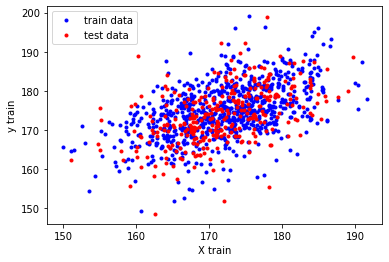

In [15]:
# 훈련데이터(파란색)와 테스트데이터(붉은색)
plt.plot(X_train, y_train, 'b.', label='train data')
plt.plot(X_test, y_test, 'r.', label='test data')
plt.legend()
plt.xlabel('X train')
plt.ylabel('y train')

# 모델 적합 

In [16]:
lr = LinearRegression()

lr.fit(X_train.values.reshape(-1,1), y_train) # reshape(-1,1)로 컬럼개수가 1인 행렬로 조정

LinearRegression()

In [17]:
[lr.coef_, lr.intercept_]

[array([0.50355769]), 88.14029039182932]

In [18]:
# y = b + ax -> 새로운 값의 예측결과값을 반환하는 함수
f = lambda x : lr.intercept_ + (lr.coef_ * x)

# 시각화

In [19]:
# train 데이터의 x 값 범위 (최솟값, 최댓값)
x = np.array([min(X_train), max(X_train)])
x

array([149.88032  , 191.6021822])

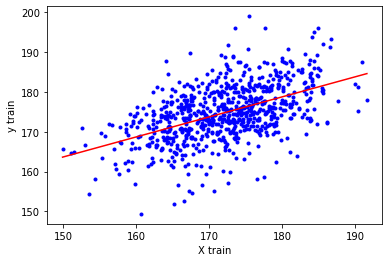

In [21]:
plt.plot(X_train, y_train, 'b.')
plt.xlabel('X train')
plt.ylabel('y train')
plt.plot(x, f(x), 'r')

In [22]:
# test 데이터의 x값 범위 (최솟값, 최댓값)
x = np.array([min(X_test), max(X_test)])
x

array([151.0891314, 189.7185944])

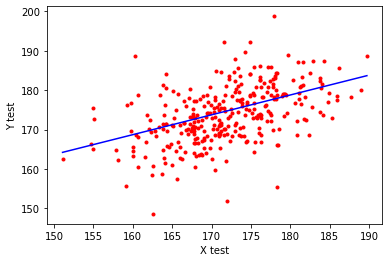

In [23]:
plt.plot(X_test, y_test, 'r.')
plt.xlabel('X test')
plt.ylabel('Y test')
plt.plot(x, f(x), 'b')

# 회귀모형을 통한 예측 

In [24]:
y_pred = lr.predict(X_test.values.reshape(-1,1))
y_pred

array([169.85014541, 178.47356322, 172.69337968, 172.59824494,
       179.09004604, 173.49896805, 177.28700103, 170.80900073,
       175.26274664, 180.70922956, 177.53941889, 173.29071532,
       173.99343078, 172.22196518, 180.6644377 , 174.62035054,
       177.74946227, 178.60240057, 173.9003425 , 168.71163661,
       177.90246062, 174.26704228, 173.82157943, 170.66504517,
       173.44440435, 166.05313359, 176.17345903, 175.34865953,
       172.55717508, 171.96741133, 180.84082963, 173.4415521 ,
       174.23610239, 174.26660741, 176.40346817, 175.69032856,
       180.01458481, 171.60083946, 181.74686074, 174.53379814,
       175.80051756, 176.20034438, 174.34913084, 168.57280999,
       172.62505354, 169.99183707, 172.54088015, 175.69264361,
       180.22814554, 168.92714148, 176.92017335, 172.66258048,
       176.83360816, 175.60363546, 174.30597615, 169.04055365,
       170.45385065, 172.87461915, 172.80530816, 172.6334824 ,
       174.91312201, 170.8792582 , 169.7719579 , 175.69

In [25]:
# f 함수를 이용 
f(180)

array([178.7806749])

In [26]:
lr.predict([[180]])

array([178.7806749])

In [27]:
lr.predict(np.array([180]).reshape(-1,1))

array([178.7806749])

# 성능평가

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [30]:
# 결정계수 
r2 = r2_score(y_test, y_pred)

In [31]:
print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2: %.2f" % r2)

MAE: 4.91
MSE: 40.31
RMSE: 6.35
R2: 0.23


---

# Linear Regression 실습 )_Manhattan
   * 집값에 대한 회귀모형 
   * X 변수가 여러개인 Multiple Lienar Regression

In [100]:
df = pd.read_csv('/Users/hayeon/Downloads/manhattan.csv')

In [102]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [103]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [104]:
# x 데이터와 y 데이터 분리하기 
X = df.drop(['borough', 'neighborhood','rental_id','rent'], axis=1)
y = df[['rent']]

In [106]:
# train 데이터와 test 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 적합 

In [107]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

# 회귀모형을 통한 예측

In [108]:
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [109]:
my_apt = [[1, 1, 600, 16, 1, 8, 1, 0, 1, 0, 0, 1, 1, 0]]
mlr.predict(my_apt)

array([[2843.21472973]])

In [110]:
y_pred = mlr.predict(X_test)

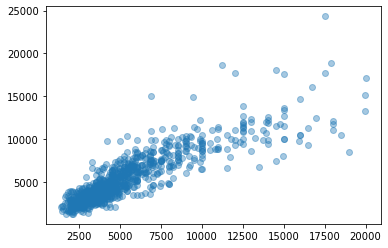

In [112]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.show()

# 회귀계수

In [113]:
# X 변수에 대한 기울기 
print(mlr.coef_)

[[-3.37442440e+02  1.14772852e+03  5.02185987e+00 -1.30836256e+01
   2.39856476e+01 -7.13826956e+00 -9.63291469e+01  6.83771666e-01
   8.75351951e+01 -8.53967304e+01  1.38431646e+02 -9.02201864e-01
  -2.17216255e+02 -1.65474531e+01]]


In [114]:
# y 절편 
print(mlr.intercept_)

[-510.81634984]


# 변수별 상관 확인

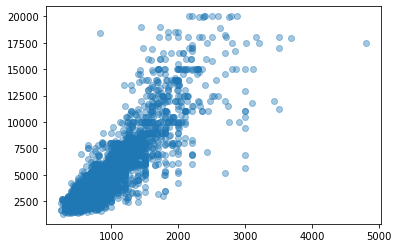

In [115]:
# 넓이와 집값 간 상관관계 
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

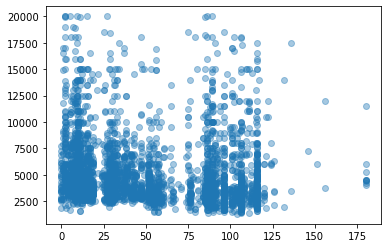

In [116]:
# 연식과 집값 간 상관관계
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

# 성능평가 

In [117]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [118]:
print('MAE: %.2f' % mae)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)
print('R2: %.2f' % r2)

MAE: 951.32
MSE: 2271426.68
RMSE: 1507.13
R2: 0.77


# 변수 5개

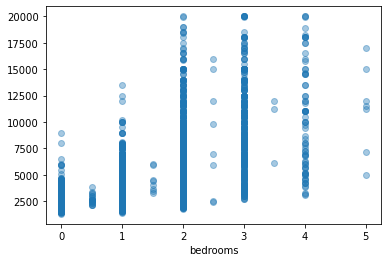

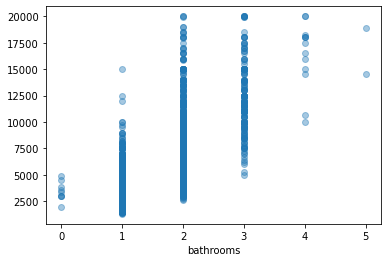

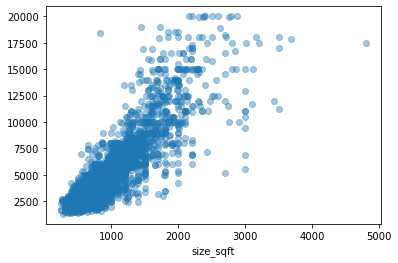

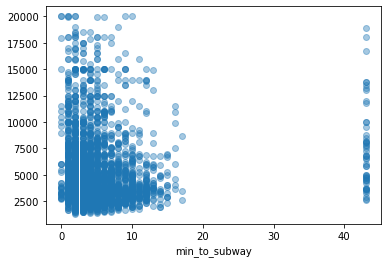

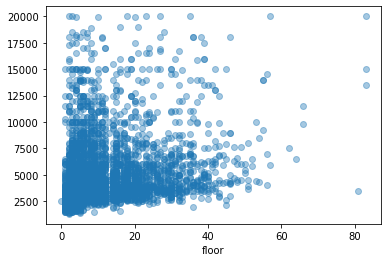

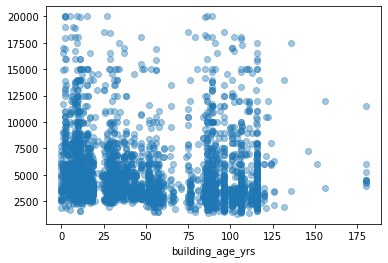

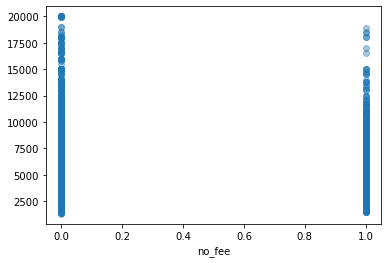

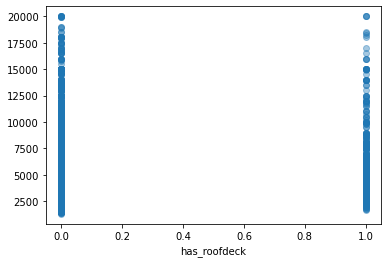

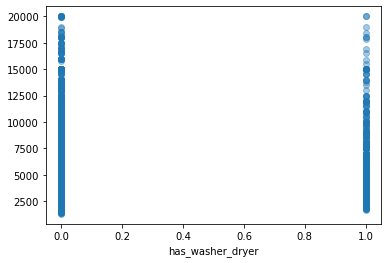

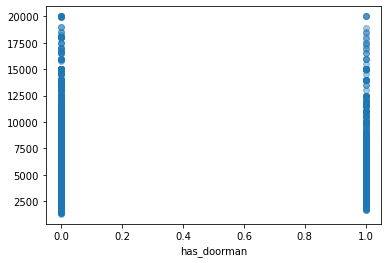

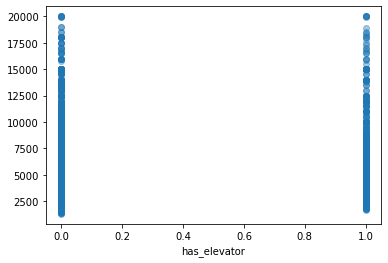

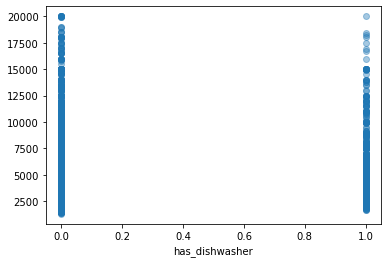

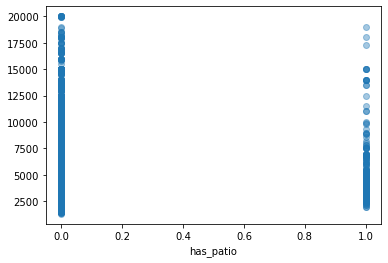

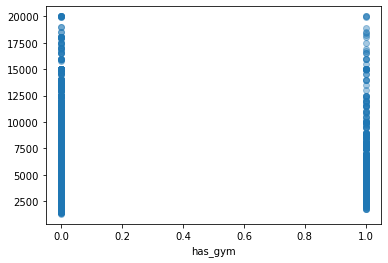

In [130]:
for i in range(0, len(X.columns)):
    plt.scatter(X[[X.columns[i]]], df[['rent']], alpha=0.4)
    plt.xlabel(X.columns[i])
    plt.show()

In [150]:
X2 = X[['bedrooms', 'bathrooms','size_sqft','floor','building_age_yrs']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

In [152]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

In [153]:
print(lr2.coef_, lr2.intercept_)

[[-349.98506938 1129.68297798    5.07208257   23.4554711    -6.62441266]] [-621.21859573]


In [154]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2: %.2f" % r2)

MAE: 951.56
MSE: 2288284.98
RMSE: 1512.71
R2: 0.77


#### <변수 고르기 전>
- MAE: 951.32
- MSE: 2271426.68
- RMSE: 1507.13
- R2: 0.77
#### < 변수 고른 후 >
- MAE: 951.56
- MSE: 2288284.98
- RMSE: 1512.71
- R2: 0.77


## 따릉이 대여량 예측
   * 데이콘의 따릉이 대여량 예측 대회의 데이터를 다운
   * 날짜, 풍향, 구름의 양, 습도, 기온 등으로 일별 대여량 예측

In [155]:
b = pd.read_csv('/Users/hayeon/Downloads/dataset/bicycle.csv')

In [156]:
b

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


# 데이터 분리

In [339]:
X = b.drop(['number_of_rentals', 'date_time'], axis=1)
y = b[['number_of_rentals']]

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 모델 적합

In [414]:
lr_b = LinearRegression()
lr_b.fit(X_train, y_train)
y_pred = lr_b.predict(X_test)

# 회귀계수

In [415]:
print(lr_b.coef_, lr_b.intercept_)

[[ 5.41275922e+01  1.89734912e+04  9.96382528e+04 -8.99510304e+03
   9.41594607e+01  1.38251643e+03 -1.80687450e+02 -2.78567641e+03]] [43839.88616148]


# 성능

In [416]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2: %.2f" % r2)

MAE: 16691.54
MSE: 392719051.46
RMSE: 19817.14
R2: 0.53


### 기상정보로 따릉이 대여량을 예측하는 것은 50% 정도의 정확도를 가진다. 
* 기상정보와 대여량은 뚜렷하게 관련이 있을 것 같은데 50%의 정확도가 나온 이유 중 데이터의 양이 적기 때문일 수도 있을 것 같다. 

---


# 중고차 가격 예측

In [186]:
car = pd.read_csv('/Users/hayeon/Downloads/car.csv')
car.drop(['Unnamed: 0'], axis=1, inplace=True)
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


* Kilometers_Driven : 주행거리
* Fuel_Type : 연료 유형 
* Transmission : 자동 / 수동
* Mileage : 자동차 회사에서 제공하는 표준 주행거리
* Engine : 엔진 배기량 


In [187]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# 데이터 전처리

In [259]:
car.drop(['New_Price'], axis=1, inplace=True)

In [222]:
car.loc[car['Fuel_Type'].isin(['CNG']),'Fuel_Type']=0
car.loc[car['Fuel_Type'].isin(['Diesel']),'Fuel_Type']=1
car.loc[car['Fuel_Type'].isin(['Petrol']),'Fuel_Type']=2
car.loc[car['Fuel_Type'].isin(['LPG']),'Fuel_Type']=3
car.loc[car['Fuel_Type'].isin(['Electric']),'Fuel_Type']=3

In [225]:
car.loc[car['Transmission'].isin(['Manual']),'Transmission']=0
car.loc[car['Transmission'].isin(['Automatic']),'Transmission']=1

In [228]:
car.loc[car['Owner_Type'].isin(['First']),'Owner_Type']=0
car.loc[car['Owner_Type'].isin(['Second']),'Owner_Type']=1
car.loc[car['Owner_Type'].isin(['Fourth & Above']),'Owner_Type']=2
car.loc[car['Owner_Type'].isin(['Third']),'Owner_Type']=3

In [262]:
car['Mileage'].fillna(0, inplace=True)

In [276]:
for i in range(0, len(car)):
    car['Mileage'][i]=str(car['Mileage'][i]).split()[0]

<ipython-input-276-8e62c738433a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Mileage'][i]=str(car['Mileage'][i]).split()[0]


# 데이터 분리

In [479]:
X = car.drop(['Name','Location', 'Price'], axis=1)
y = car[['Price']]

In [480]:
X.drop(['Engine', 'Power'], axis=1, inplace=True)

X['Seats'].fillna(X['Seats'].mean(), inplace=True)

X['Fuel_Type']=X['Fuel_Type'].astype(int)

X['Transmission']=X['Transmission'].astype(int)

X['Owner_Type']=X['Owner_Type'].astype(int)

X['Mileage']=X['Mileage'].astype(float)

# 모델적합

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr_car = LinearRegression()
lr_car.fit(X_train, y_train)
y_pred = lr_car.predict(X_test)

# 성능

In [528]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2: %.2f" % r2)

MAE: 4.58
MSE: 59.50
RMSE: 7.71
R2: 0.54


### 차량의 다양한 정보로 중고차 가격을 예측하는 것의 정확도는 54%이다.  
### 
